In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timezone
import pygmt
import matplotlib.pyplot as plt

In [2]:
catalog_dir = "/uufs/chpc.utah.edu/common/home/koper-group3/alysha/ben_catalogs/20230103"
ys_arr_df = pd.read_csv(f"{catalog_dir}/yellowstone_arrivals_20121001_20230103.csv")
ys_ev_df = pd.read_csv(f"{catalog_dir}/yellowstone_events_20121001_20230103.csv")
ml_df = pd.read_csv(f"{catalog_dir}/earthquakeLocalMagnitudeCatalog.csv")

# Filter Local Mag Catalog for Yellowstone

In [3]:
ml_df.columns

Index(['evid', 'sta', 'net', 'seedchan', 'location', 'magtype', 'auth',
       'subsource', 'amplitude', 'amptype', 'units', 'datetime', 'mag',
       'magres', 'magcorr', 'weight', 'assocamm_in_wgt', 'amp_rflag', 'cflag',
       'wstart', 'duration', 'amp_quality', 'period', 'snr'],
      dtype='object')

In [4]:
ml_df.head()

,evid,sta,net,seedchan,location,magtype,auth,subsource,amplitude,amptype,...,magcorr,weight,assocamm_in_wgt,amp_rflag,cflag,wstart,duration,amp_quality,period,snr
0,60000045,KNB,UU,HHE,01,l,UU,Jiggle,0.372118,WAS,...,0.21,1,1.0,H,OS,1.350389e+09,12.778965,1.0,0.16,7.273734
1,60000045,KNB,UU,HHN,01,l,UU,Jiggle,0.200918,WAS,...,0.21,1,1.0,H,OS,1.350389e+09,12.778965,1.0,0.14,6.946954
2,60000045,LCMT,UU,HHN,01,l,UU,Jiggle,0.613833,WAS,...,-0.12,1,1.0,F,OS,1.350389e+09,1.100000,1.0,0.16,11.710181
3,60000045,LCMT,UU,HHE,01,l,UU,Jiggle,0.431768,WAS,...,-0.12,1,1.0,F,OS,1.350389e+09,0.670000,1.0,0.14,9.821483
4,60000045,CCUT,UU,HHE,01,l,UU,Jiggle,0.029070,WAS,...,0.31,1,1.0,H,OS,1.350389e+09,28.855159,1.0,0.36,3.520239


In [5]:
ml_df['magtype'].unique()

array(['l'], dtype=object)

Date range is the same as other YS catalogs 2012/10/01 to 2023/01/03

In [6]:
datetime.fromtimestamp(ml_df['datetime'].min(), tz=timezone.utc)

datetime.datetime(2012, 10, 1, 4, 58, 34, 664999, tzinfo=datetime.timezone.utc)

In [7]:
datetime.fromtimestamp(ml_df['datetime'].max(), tz=timezone.utc)

datetime.datetime(2023, 1, 3, 22, 43, 45, 920000, tzinfo=datetime.timezone.utc)

Get the yellowstone events using evids

In [8]:
ml_matching_df = ml_df[ml_df['evid'].isin(ys_ev_df['evid'])]

In [9]:
len(ml_matching_df[ml_matching_df['sta'] == 'YHH'])

36

There are more phase arrivals than amplitudes for local mags, which makes sense

In [10]:
len(ys_arr_df[ys_arr_df['magnitude_type'] == 'l'])

119246

In [11]:
len(ml_matching_df)

49283

There are amplitude values for events that do not have a preferred M_L type. 

In [12]:
ys_ev_df.value_counts('magnitude_type')

magnitude_type
d    10613
l     7652
h      366
w        1
Name: count, dtype: int64

In [13]:
ml_matching_df['evid'].unique().shape

(7852,)

In [14]:
ml_df.drop_duplicates('evid')[['evid']].merge(ys_ev_df[['evid', 'magnitude_type']], how='inner').value_counts('magnitude_type')

magnitude_type
l    7652
d     193
h       6
w       1
Name: count, dtype: int64

Just keep amplitude values for events with preferred magnitude type M_L

In [15]:
ys_ml_df = ml_df[ml_df['evid'].isin(ys_ev_df[ys_ev_df['magnitude_type'] == 'l']['evid'])]

In [16]:
len(ys_ml_df)

47951

There are 7652 events in the YS catalog with preferred mag type M_L and 7652 with amplitude values in the local mag catalog!

In [17]:
assert len(ys_ml_df.drop_duplicates('evid')) == len(ys_ev_df[ys_ev_df.magnitude_type == 'l'])

In [18]:
ys_ml_df.to_csv(f"{catalog_dir}/yellowstone_local_mag_prefMlOnly_20121001_20230103.csv", index=False)

In [19]:
ys_ml_df['sta'].value_counts()

sta
YNR     12352
YMR     11902
YFT      7046
YHB      6199
YUF      4084
LKWY     3446
BOZ      1642
AHID      340
HLID      252
BW06      210
HWUT       86
HVU        84
TCU        76
RDMU       46
CTU        42
SPU        24
JLU        18
DUG        18
BGU        16
NOQ        14
MPU        12
ELK        12
NLU        10
LOHW        8
YDD         6
TMU         4
SRU         2
Name: count, dtype: int64

Keeping only preferred local mag events removes amplitude measurements from some stations that have a James station correction

In [20]:
ml_matching_df.sta.unique()

array(['LKWY', 'YFT', 'YUF', 'YNR', 'YMR', 'YHB', 'BOZ', 'CTU', 'HLID',
       'BW06', 'TCU', 'HVU', 'AHID', 'HWUT', 'YPP', 'YTP', 'YHH', 'YMP',
       'YHL', 'YNE', 'SPU', 'NOQ', 'JLU', 'MPU', 'RDMU', 'DUG', 'BGU',
       'NLU', 'ELK', 'YHR', 'LOHW', 'REDW', 'TMU', 'YDD', 'SRU'],
      dtype=object)

In [21]:
ys_ml_df.sta.unique()

array(['LKWY', 'YFT', 'YUF', 'YNR', 'YMR', 'YHB', 'BOZ', 'CTU', 'HLID',
       'BW06', 'TCU', 'HVU', 'AHID', 'HWUT', 'SPU', 'NOQ', 'JLU', 'MPU',
       'RDMU', 'DUG', 'BGU', 'ELK', 'NLU', 'TMU', 'YDD', 'SRU', 'LOHW'],
      dtype=object)

# Look at the amplitudes now

mag column is the station mag, not network mag

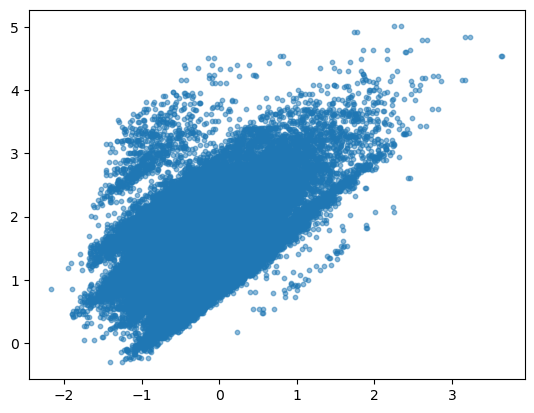

In [22]:
plt.scatter(np.log10(ys_ml_df['amplitude']) + 1, ys_ml_df['mag'], s=10, alpha=0.5)

In [23]:
# Not sure if I should be multiplying by something. I think it is in mm, so that would be multiply by 10. 
ys_logA = ys_ml_df[['evid', 'sta', 'seedchan', 'amplitude', 'magcorr', 'magres', 'mag', 'units', 'amptype']].copy()
ys_logA.loc[:, 'logA'] =  np.log10(10*ys_logA['amplitude'])

In [24]:
ys_logA['amptype'].value_counts()

amptype
WAS    47951
Name: count, dtype: int64

In [25]:
ys_logA['units'].value_counts()

units
cm    47700
mm      251
Name: count, dtype: int64

In [26]:
ys_logA['magres']

24        0.06
25        0.06
26       -0.25
27        0.59
28        0.59
          ... 
128099   -0.09
128136   -0.24
128137   -0.24
128138    0.24
128139    0.24
Name: magres, Length: 47951, dtype: float64

logA don't agree great with station mag, probably because logA_0 being taken into account

In [27]:
ys_logA[['evid', 'logA', 'magcorr', 'mag']]

,evid,logA,magcorr,mag
24,60000620,1.006126,0.06,2.25
25,60000620,0.735761,0.06,2.25
26,60000620,0.213890,0.20,1.94
27,60000620,0.610896,0.61,2.78
28,60000620,0.530381,0.61,2.78
...,...,...,...,...
128099,60528897,-0.134067,-0.38,0.88
128136,60528982,0.132178,-0.38,0.97
128137,60528982,-0.037769,-0.38,0.97
128138,60528982,-0.280813,0.18,1.45


'mag' column is station mag - likely uses average of the two component amplitudes - not the catalog mag. Averaging the station mags gives the catalog mag

I think 'magcorr' is the station correction, but there is more than 10 of them so maybe not?

In [28]:
# More than 10 stations with magcorr
ys_ml_df[['sta', 'magcorr']].drop_duplicates()

,sta,magcorr
24,LKWY,0.06
26,YFT,0.20
27,YUF,0.61
30,YNR,0.35
32,YMR,-0.38
33,YHB,0.18
166,BOZ,0.17
168,CTU,0.10
170,HLID,0.05
288,BW06,-0.15


In [29]:
ys_logA[ys_logA['evid'] == 60000620][['sta', 'seedchan', 'mag']]

,sta,seedchan,mag
24,LKWY,BHE,2.25
25,LKWY,BHN,2.25
26,YFT,HHE,1.94
27,YUF,HHN,2.78
28,YUF,HHE,2.78
29,YFT,HHN,1.94
30,YNR,HHE,2.47
31,YNR,HHN,2.47
32,YMR,HHN,1.73
33,YHB,HHN,2.00


In [30]:
ys_ml_df[ys_ml_df['evid'] == 60000620]['mag'].mean()

2.195

In [31]:
ys_ev_df[ys_ev_df['evid'] == 60000620]

,evid,event_lat,event_lon,event_depth,origin_time,magnitude,magnitude_type,rflag,utc
46,60000620,44.4745,-110.552667,4.43,1.357546e+09,2.19,l,F,2013-01-07 08:12:32.649998+00:00


In [32]:
ys_ml_df[ys_ml_df['sta'] == "LKWY"]['magcorr'].unique()

array([0.06])

# James Amp catalog

In [3]:
james_amps = pd.read_csv('/uufs/chpc.utah.edu/common/home/u1072028/PycharmProjects/ynp_local_magnitude_recalibration/catalogs/amplitudes/yellowstone.amps.clean.csv')

In [34]:
james_amps.columns

Index(['Evid', 'Date', 'Time', 'EqLat', 'EqLon', 'EqDep', 'EqML', 'EqMC', 'N',
       'Dmin', 'ErrZ', 'ErrR', 'Net', 'Sta', 'Cmp', 'SLat', 'SLon', 'SElev',
       'Repi', 'Rhyp', 'SML', 'Corr', 'AmpE', 'UnE', 'PerE', 'SnrE', 'AmpN',
       'UnN', 'PerN', 'SnrN', 'halfAmpH', 'CatMag', 'H', 'GoodDep'],
      dtype='object')

In [4]:
james_amps["Date"].min()

'1998-02-02'

In [5]:
james_amps["Date"].max()

'2020-06-26'

In [35]:
james_amps[['AmpE', 'UnE', 'PerE', 'SnrE', 'AmpN','UnN', 'PerN', 'SnrN']].describe()

,AmpE,PerE,SnrE,AmpN,PerN,SnrN
count,25743.000000,21556.000000,25743.000000,25743.000000,21556.000000,25743.000000
mean,4.903286,0.344492,50.996110,4.648515,0.352972,52.775550
std,47.372217,0.232387,509.561942,43.365094,0.232614,637.443359
min,0.009492,0.000000,0.662678,0.012480,0.000000,0.180000
25%,0.248665,0.200000,3.614344,0.240102,0.220000,3.634772
50%,0.597060,0.300000,8.020826,0.582739,0.320000,8.266130
75%,1.844491,0.420000,22.253078,1.785337,0.420000,22.818437
max,4415.609440,4.880000,52735.796900,4234.119420,4.880000,78013.171900


In [36]:
james_amps['UnE'].unique()

array(['mm'], dtype=object)

Do a simple merge of the two catalog to see how the values compare

In [37]:

james_ben_merge = james_amps[['Evid', 'Sta', 'Rhyp', 'Repi', 'Corr', 'AmpE', 'AmpN', 'halfAmpH', 'SML', 'CatMag', 'EqLon', 'EqLat', 'EqDep', 'SLon', 'SLat']].merge(ys_ml_df[['evid', 'sta', 'seedchan', 'amplitude', 'mag', 'magcorr']], left_on=['Evid', 'Sta'], right_on=['evid', 'sta'], how='inner')

In [38]:
james_ben_merge.head()

,Evid,Sta,Rhyp,Repi,Corr,AmpE,AmpN,halfAmpH,SML,CatMag,...,EqLat,EqDep,SLon,SLat,evid,sta,seedchan,amplitude,mag,magcorr
0,60000620,LKWY,16.965698,15.7,0.06,10.142060,5.442032,3.896023,2.25,2.19,...,44.474,6.43,-110.40000,44.56520,60000620,LKWY,BHE,1.014206,2.25,0.06
1,60000620,LKWY,16.965698,15.7,0.06,10.142060,5.442032,3.896023,2.25,2.19,...,44.474,6.43,-110.40000,44.56520,60000620,LKWY,BHN,0.544203,2.25,0.06
2,60000620,YFT,23.496913,22.6,0.20,1.636402,1.153130,0.697383,1.94,2.19,...,44.474,6.43,-110.83583,44.45133,60000620,YFT,HHE,0.163640,1.94,0.20
3,60000620,YFT,23.496913,22.6,0.20,1.636402,1.153130,0.697383,1.94,2.19,...,44.474,6.43,-110.83583,44.45133,60000620,YFT,HHN,0.115313,1.94,0.20
4,60000620,YHB,59.846428,59.5,0.18,0.196325,0.218335,0.103665,2.00,2.19,...,44.474,6.43,-111.19620,44.75080,60000620,YHB,HHN,0.021834,2.00,0.18


Using a rough epicentral distance correction (eq from Pechman, 2007) can get much closer to the station magnitude estimate. I'm not sure if use the average amplitude of the two stations or half of the average amplitude. The average amplitude gets closer to the actual mag, but there could also be a different eq for epicentral distance. Though uuss uses epicentral correction, but could be hypocentral.

In [39]:
#Average amplitude
np.log10((10.14+5.44)/2) - (1.1 - 2*np.log10(15.7)) + 0.06

2.243336762491032

In [40]:
# 1/2 average amplitude
np.log10(3.896) - (1.1 - 2*np.log10(15.7)) + 0.06

1.9424182530250453

In [41]:
ys_ml_df['seedchan'].value_counts()

seedchan
HHE    20938
HHN    20937
BH1     1871
BH2     1871
BHE     1136
BHN     1136
ENN       31
ENE       31
Name: count, dtype: int64

Ben and James's amplitude values are very close. James's all seem to be in mm and most of Ben's are in cm. There are a few of Ben's in mm, that why I use the median here. 

In [42]:
(james_ben_merge[james_ben_merge['seedchan'].isin(['HHE', 'BHE', 'ENE', 'BH1'])]['AmpE'] - (james_ben_merge[james_ben_merge['seedchan'].isin(['HHE', 'BHE', 'ENE'])]['amplitude']*10)).median()

-4.375405593393111e-11

In [43]:
(james_ben_merge[james_ben_merge['seedchan'].isin(['HHN', 'BHN', 'ENN', 'BH2'])]['AmpN'] - (james_ben_merge[james_ben_merge['seedchan'].isin(['HHN', 'BHN', 'ENN'])]['amplitude']*10)).median()

-8.90350015936292e-11

Get amplitude values into James's format
1. Convert cm to mm 
2. Compute 1/2 station average
3. Compare to James's values

In [44]:
# Make Amp column, with all units in mm
ys_ml_df.loc[:, "Amp"] = ys_ml_df['amplitude']
ys_ml_df.loc[ys_ml_df['units'] == 'cm', 'Amp'] = ys_ml_df.loc[ys_ml_df['units'] == 'cm', 'Amp']*10


/tmp/ipykernel_3277974/1583837018.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ys_ml_df.loc[:, "Amp"] = ys_ml_df['amplitude']


In [45]:
# Check amp values make sense for cm (x10)
ys_ml_df[['units', 'amplitude', 'Amp']].head()

,units,amplitude,Amp
24,cm,1.014206,10.142061
25,cm,0.544203,5.442032
26,cm,0.163640,1.636402
27,cm,0.408221,4.082212
28,cm,0.339141,3.391413


In [46]:
# Check amp values make sense for mm (no change)
ys_ml_df[ys_ml_df['units']=='mm'][['units', 'amplitude', 'Amp']].head()

,units,amplitude,Amp
11628,mm,0.1578,0.1578
11629,mm,0.1137,0.1137
11886,mm,2.3700,2.3700
11887,mm,2.1310,2.1310
11888,mm,0.4900,0.4900


In [47]:
# Get the channel types so can separate by E and N components
ys_ml_df['seedchan'].value_counts()

seedchan
HHE    20938
HHN    20937
BH1     1871
BH2     1871
BHE     1136
BHN     1136
ENN       31
ENE       31
Name: count, dtype: int64

In [48]:
ys_ml_df.loc[:, "seedchanpref"] = ys_ml_df.apply(lambda x: x.seedchan[0:2], axis=1)

/tmp/ipykernel_3277974/2564405152.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ys_ml_df.loc[:, "seedchanpref"] = ys_ml_df.apply(lambda x: x.seedchan[0:2], axis=1)


# ERROR! Cannot merge on subsource because the subsource may be Jiggle or RT2 for any amplitude, not necessarily the same for the same event/station. Also do not merge on SMl if using other mag types than 'l' because events that have not been opened in Jiggle do not average the amplitudes and have different SML values

In [49]:
# Get the information that is the same for different components of the same station for the same event
ys_ml_reform = ys_ml_df[['evid', 'sta', 'net', 'location', 'magtype', 'auth', 'subsource', 'mag', 'magres', 'magcorr', 'seedchanpref']].drop_duplicates().copy()

In [50]:
# Add in the information for the E channel in the same event/station row
ys_ml_reform_E = ys_ml_reform.merge(ys_ml_df[ys_ml_df['seedchan'].isin(['HHE', 'BH1', 'BHE', 'ENE'])], 
                   on=['evid', 'sta', 'net', 'location', 'magtype', 'auth', 'subsource', 'mag', 'magres', 'magcorr', 'seedchanpref'], how='left')

In [51]:
# Add in the information for the N channel in the same event/station row
ys_ml_reform_EN = ys_ml_reform_E.merge(ys_ml_df[ys_ml_df['seedchan'].isin(['HHN', 'BH2', 'BHN', 'ENN'])], 
                   on=['evid', 'sta', 'net', 'location', 'magtype', 'auth', 'subsource', 'mag', 'magres', 'magcorr', 'seedchanpref'], 
                   suffixes=('E', 'N'), how='left')

# End Error?

In [52]:
# Make sure the size stayed consistent 
print(len(ys_ml_reform), len(ys_ml_reform_E), len(ys_ml_reform_EN))

24031 24031 24031


In [53]:
# Make sure the reformatted df has the same amount of station info as the original
len(ys_ml_reform_EN[~np.isnan(ys_ml_reform_EN['AmpE'])]) + len(ys_ml_reform_EN[~np.isnan(ys_ml_reform_EN['AmpN'])]) == len(ys_ml_df)

True

In [54]:
ys_ml_reform_EN.drop('seedchanpref', axis=1)

,evid,sta,net,location,magtype,auth,subsource,mag,magres,magcorr,...,weightN,assocamm_in_wgtN,amp_rflagN,cflagN,wstartN,durationN,amp_qualityN,periodN,snrN,AmpN
0,60000620,LKWY,US,01,l,UU,Jiggle,2.25,0.06,0.06,...,1.0,1.0,H,OS,1.357546e+09,10.854288,1.0,0.35,4.276043,5.442032
1,60000620,YFT,WY,01,l,UU,Jiggle,1.94,-0.25,0.20,...,1.0,1.0,H,OS,1.357546e+09,13.405932,1.0,0.48,3.960521,1.153130
2,60000620,YUF,WY,01,l,UU,Jiggle,2.78,0.59,0.61,...,1.0,1.0,F,OS,1.357546e+09,3.590000,1.0,0.26,5.097910,4.082212
3,60000620,YNR,WY,01,l,UU,Jiggle,2.47,0.28,0.35,...,1.0,1.0,H,OS,1.357546e+09,15.644055,1.0,0.26,4.453766,2.025919
4,60000620,YMR,WY,01,l,UU,Jiggle,1.73,-0.46,-0.38,...,1.0,1.0,H,OS,1.357546e+09,19.596506,1.0,0.56,7.295910,1.084684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24026,60528892,AHID,US,00,l,UU,Jiggle,2.24,0.03,-0.43,...,1.0,1.0,F,OS,1.672399e+09,2.025000,1.0,0.65,21.943213,0.438571
24027,60528897,YHB,WY,01,l,UU,Jiggle,1.06,0.09,0.18,...,1.0,1.0,H,OS,1.672418e+09,11.202623,1.0,0.26,5.677681,0.579664
24028,60528897,YMR,WY,01,l,UU,Jiggle,0.88,-0.09,-0.38,...,1.0,1.0,F,OS,1.672418e+09,0.360000,1.0,0.42,16.905321,0.734400
24029,60528982,YMR,WY,01,l,UU,Jiggle,0.97,-0.24,-0.38,...,1.0,1.0,F,OS,1.672658e+09,0.290000,1.0,0.20,8.926793,0.916707


In [55]:
ys_ml_reform_EN.columns

Index(['evid', 'sta', 'net', 'location', 'magtype', 'auth', 'subsource', 'mag',
       'magres', 'magcorr', 'seedchanpref', 'seedchanE', 'amplitudeE',
       'amptypeE', 'unitsE', 'datetimeE', 'weightE', 'assocamm_in_wgtE',
       'amp_rflagE', 'cflagE', 'wstartE', 'durationE', 'amp_qualityE',
       'periodE', 'snrE', 'AmpE', 'seedchanN', 'amplitudeN', 'amptypeN',
       'unitsN', 'datetimeN', 'weightN', 'assocamm_in_wgtN', 'amp_rflagN',
       'cflagN', 'wstartN', 'durationN', 'amp_qualityN', 'periodN', 'snrN',
       'AmpN'],
      dtype='object')

In [56]:
# Visual check of the reformatted values against the original
ys_ml_reform_EN[['evid', 'sta', 'mag','magres', 'magcorr', 'seedchanE', 'amplitudeE', 'unitsE',
       'periodE', 'snrE', 'AmpE', 'seedchanN', 'amplitudeN', 'unitsN', 'periodN', 'snrN', 'AmpN']].head()

,evid,sta,mag,magres,magcorr,seedchanE,amplitudeE,unitsE,periodE,snrE,AmpE,seedchanN,amplitudeN,unitsN,periodN,snrN,AmpN
0,60000620,LKWY,2.25,0.06,0.06,BHE,1.014206,cm,0.35,4.326750,10.142061,BHN,0.544203,cm,0.35,4.276043,5.442032
1,60000620,YFT,1.94,-0.25,0.20,HHE,0.163640,cm,0.26,3.057469,1.636402,HHN,0.115313,cm,0.48,3.960521,1.153130
2,60000620,YUF,2.78,0.59,0.61,HHE,0.339141,cm,0.26,5.399999,3.391413,HHN,0.408221,cm,0.26,5.097910,4.082212
3,60000620,YNR,2.47,0.28,0.35,HHE,0.213206,cm,0.14,4.227587,2.132057,HHN,0.202592,cm,0.26,4.453766,2.025919
4,60000620,YMR,1.73,-0.46,-0.38,HHE,0.095853,cm,1.00,9.726373,0.958534,HHN,0.108468,cm,0.56,7.295910,1.084684


In [57]:
# Original values for comparison
ys_ml_df[['evid', 'sta', 'mag','magres', 'magcorr', 'seedchan', 'amplitude', 'units', 'period', 'snr', 'Amp']].head()

,evid,sta,mag,magres,magcorr,seedchan,amplitude,units,period,snr,Amp
24,60000620,LKWY,2.25,0.06,0.06,BHE,1.014206,cm,0.35,4.326750,10.142061
25,60000620,LKWY,2.25,0.06,0.06,BHN,0.544203,cm,0.35,4.276043,5.442032
26,60000620,YFT,1.94,-0.25,0.20,HHE,0.163640,cm,0.26,3.057469,1.636402
27,60000620,YUF,2.78,0.59,0.61,HHN,0.408221,cm,0.26,5.097910,4.082212
28,60000620,YUF,2.78,0.59,0.61,HHE,0.339141,cm,0.26,5.399999,3.391413


In [58]:
james_amps.columns

Index(['Evid', 'Date', 'Time', 'EqLat', 'EqLon', 'EqDep', 'EqML', 'EqMC', 'N',
       'Dmin', 'ErrZ', 'ErrR', 'Net', 'Sta', 'Cmp', 'SLat', 'SLon', 'SElev',
       'Repi', 'Rhyp', 'SML', 'Corr', 'AmpE', 'UnE', 'PerE', 'SnrE', 'AmpN',
       'UnN', 'PerN', 'SnrN', 'halfAmpH', 'CatMag', 'H', 'GoodDep'],
      dtype='object')

Now add it eq information like the event lat, event lon, station lat, station lon.

Cannot just use the arrival df because there seems to be amplitude values at stations without picks. 

In [59]:
ys_arr_df.columns

Index(['evid', 'network', 'station', 'location', 'channelz', 'phase',
       'arrival_id', 'arrival_time', 'pick_quality', 'first_motion',
       'take_off_angle', 'source_receiver_distance', 'source_receiver_azimuth',
       'travel_time_residual', 'receiver_lat', 'receiver_lon', 'receiver_elev',
       'event_lat', 'event_lon', 'event_depth', 'origin_time', 'magnitude',
       'magnitude_type', 'rflag', 'utc'],
      dtype='object')

In [60]:
#  27 stations with amplitudes in Ben catalog
ys_ml_df['sta'].value_counts()

sta
YNR     12352
YMR     11902
YFT      7046
YHB      6199
YUF      4084
LKWY     3446
BOZ      1642
AHID      340
HLID      252
BW06      210
HWUT       86
HVU        84
TCU        76
RDMU       46
CTU        42
SPU        24
JLU        18
DUG        18
BGU        16
NOQ        14
MPU        12
ELK        12
NLU        10
LOHW        8
YDD         6
TMU         4
SRU         2
Name: count, dtype: int64

In [61]:
# Only 20 stations in James's catalog
james_amps['Sta'].value_counts()

Sta
YMR     5020
YNR     4262
YFT     2802
YHB     2572
LKWY    2148
YHL     2029
YHH     1781
YUF     1472
BOZ     1193
YPP     1006
YTP      397
YMP      345
YNE      280
LOHW     135
REDW     111
BUT       62
AHID      57
BW06      28
YHR       24
YEE       19
Name: count, dtype: int64

Filter amplitude values to just those with James's station corrections

In [62]:
# Stations in the filtered local mag amplitude catalog that are in James's catalog
ys_ml_reform_EN['sta'].unique()[np.isin(ys_ml_reform_EN['sta'].unique(), james_amps['Sta'].unique())]

array(['LKWY', 'YFT', 'YUF', 'YNR', 'YMR', 'YHB', 'BOZ', 'BW06', 'AHID',
       'LOHW'], dtype=object)

In [63]:
# Stations in the filtered local mag amplitude catalog that are NOT in James's catalog
ys_ml_reform_EN['sta'].unique()[~np.isin(ys_ml_reform_EN['sta'].unique(), james_amps['Sta'].unique())]

array(['CTU', 'HLID', 'TCU', 'HVU', 'HWUT', 'SPU', 'NOQ', 'JLU', 'MPU',
       'RDMU', 'DUG', 'BGU', 'ELK', 'NLU', 'TMU', 'YDD', 'SRU'],
      dtype=object)

In [64]:
# Stations with a James correction that are not in the filtered local mag amplitude catalog
james_amps['Sta'].unique()[~np.isin(james_amps['Sta'].unique(), ys_ml_reform_EN['sta'].unique())]

array(['BUT', 'YHH', 'YPP', 'YTP', 'YMP', 'YHL', 'REDW', 'YNE', 'YHR',
       'YEE'], dtype=object)

In [65]:
# Stations in unfiltered (not only local mags) catalog that are also in James's catalog
ml_matching_df['sta'].unique()[np.isin(ml_matching_df['sta'].unique(), james_amps['Sta'].unique())]

array(['LKWY', 'YFT', 'YUF', 'YNR', 'YMR', 'YHB', 'BOZ', 'BW06', 'AHID',
       'YPP', 'YTP', 'YHH', 'YMP', 'YHL', 'YNE', 'YHR', 'LOHW', 'REDW'],
      dtype=object)

In [66]:
# James's stations that are not in the unfiltered local magnitude catalog
james_amps['Sta'].unique()[~np.isin(james_amps['Sta'].unique(), ml_matching_df['sta'].unique())]

array(['BUT', 'YEE'], dtype=object)

In [67]:
ys_ml_reform_EN_filt = ys_ml_reform_EN[ys_ml_reform_EN.sta.isin(james_amps['Sta'].unique())]

In [68]:
print(len(ys_ml_reform_EN), len(ys_ml_reform_EN_filt))

24031 23670


In [69]:
ys_ml_reform_EN_filt['sta'].value_counts()

sta
YNR     6189
YMR     5967
YFT     3528
YHB     3109
YUF     2047
LKWY    1727
BOZ      824
AHID     170
BW06     105
LOHW       4
Name: count, dtype: int64

Merge filtered amplitudes with unique event and station info info

In [70]:
uniq_events = ys_ev_df[['evid', 'event_lon', 'event_lat', 'event_depth', 'magnitude', 'magnitude_type', 'utc']].drop_duplicates('evid')

In [71]:
# Station locations in Ben's catalog
# LOHW has a change in lon in some point, but it is quite small so just use the one that James has
ys_stats = ys_arr_df[ys_arr_df.station.isin(james_amps.Sta.unique())][['station', 'receiver_lon', 'receiver_lat', 'receiver_elev']].drop_duplicates('station', keep='last')

In [72]:
# Station locations in James's catalog

james_stats = james_amps[['Sta', 'SLon', 'SLat', 'SElev']].drop_duplicates()

In [73]:
# Locations are the same. Ben's catalog has no amps at BUT
james_stats.merge(ys_stats, right_on='station', left_on='Sta', how='outer')

,Sta,SLon,SLat,SElev,station,receiver_lon,receiver_lat,receiver_elev
0,AHID,-111.10040,42.765400,1.960,AHID,-111.10040,42.76540,1960.0
1,LKWY,-110.40000,44.565200,2.424,LKWY,-110.40000,44.56520,2424.0
2,BUT,-112.55666,46.010834,1.758,NaN,NaN,NaN,NaN
3,YMR,-110.96500,44.668670,2.149,YMR,-110.96500,44.66867,2149.0
4,BOZ,-111.62967,45.596970,1.589,BOZ,-111.62967,45.59697,1589.0
5,YFT,-110.83583,44.451330,2.292,YFT,-110.83583,44.45133,2292.0
6,BW06,-109.55830,42.766700,2.224,BW06,-109.55830,42.76670,2224.0
7,YNR,-110.67917,44.715500,2.336,YNR,-110.67917,44.71550,2336.0
8,YUF,-110.51170,44.712600,2.394,YUF,-110.51170,44.71260,2394.0
9,YHB,-111.19620,44.750800,2.167,YHB,-111.19620,44.75080,2167.0


In [74]:
# Add event info to Ben's amp catalog
ys_ml_reform_EN_filt = ys_ml_reform_EN_filt.merge(uniq_events, how='left', on='evid')

In [75]:
ys_ml_reform_EN_filt['magtype'].value_counts()

magtype
l    23670
Name: count, dtype: int64

In [76]:
ys_ml_reform_EN_filt['magnitude_type'].value_counts()

magnitude_type
l    23670
Name: count, dtype: int64

In [77]:
# Add stat info to Ben's amp catalog
ys_ml_reform_EN_filt = ys_ml_reform_EN_filt.merge(james_stats, how='left', left_on='sta', right_on='Sta')

In [78]:
ys_ml_reform_EN_filt.head()

,evid,sta,net,location,magtype,auth,subsource,mag,magres,magcorr,...,event_lon,event_lat,event_depth,magnitude,magnitude_type,utc,Sta,SLon,SLat,SElev
0,60000620,LKWY,US,01,l,UU,Jiggle,2.25,0.06,0.06,...,-110.552667,44.4745,4.43,2.19,l,2013-01-07 08:12:32.649998+00:00,LKWY,-110.40000,44.56520,2.424
1,60000620,YFT,WY,01,l,UU,Jiggle,1.94,-0.25,0.20,...,-110.552667,44.4745,4.43,2.19,l,2013-01-07 08:12:32.649998+00:00,YFT,-110.83583,44.45133,2.292
2,60000620,YUF,WY,01,l,UU,Jiggle,2.78,0.59,0.61,...,-110.552667,44.4745,4.43,2.19,l,2013-01-07 08:12:32.649998+00:00,YUF,-110.51170,44.71260,2.394
3,60000620,YNR,WY,01,l,UU,Jiggle,2.47,0.28,0.35,...,-110.552667,44.4745,4.43,2.19,l,2013-01-07 08:12:32.649998+00:00,YNR,-110.67917,44.71550,2.336
4,60000620,YMR,WY,01,l,UU,Jiggle,1.73,-0.46,-0.38,...,-110.552667,44.4745,4.43,2.19,l,2013-01-07 08:12:32.649998+00:00,YMR,-110.96500,44.66867,2.149


In [79]:
ys_ml_reform_EN_filt['utc'].min()

'2012-10-07 00:32:04.740000+00:00'

In [80]:
ys_ml_reform_EN_filt['utc'].max()

'2023-01-02 11:18:40.930000+00:00'

Remove some columns that are probably unneeded

In [81]:
ys_ml_reform_EN_filt.columns

Index(['evid', 'sta', 'net', 'location', 'magtype', 'auth', 'subsource', 'mag',
       'magres', 'magcorr', 'seedchanpref', 'seedchanE', 'amplitudeE',
       'amptypeE', 'unitsE', 'datetimeE', 'weightE', 'assocamm_in_wgtE',
       'amp_rflagE', 'cflagE', 'wstartE', 'durationE', 'amp_qualityE',
       'periodE', 'snrE', 'AmpE', 'seedchanN', 'amplitudeN', 'amptypeN',
       'unitsN', 'datetimeN', 'weightN', 'assocamm_in_wgtN', 'amp_rflagN',
       'cflagN', 'wstartN', 'durationN', 'amp_qualityN', 'periodN', 'snrN',
       'AmpN', 'event_lon', 'event_lat', 'event_depth', 'magnitude',
       'magnitude_type', 'utc', 'Sta', 'SLon', 'SLat', 'SElev'],
      dtype='object')

In [82]:
james_amps.columns

Index(['Evid', 'Date', 'Time', 'EqLat', 'EqLon', 'EqDep', 'EqML', 'EqMC', 'N',
       'Dmin', 'ErrZ', 'ErrR', 'Net', 'Sta', 'Cmp', 'SLat', 'SLon', 'SElev',
       'Repi', 'Rhyp', 'SML', 'Corr', 'AmpE', 'UnE', 'PerE', 'SnrE', 'AmpN',
       'UnN', 'PerN', 'SnrN', 'halfAmpH', 'CatMag', 'H', 'GoodDep'],
      dtype='object')

In [83]:
# Remove some probably unneeded columns
ys_ml_reform_EN_filt = ys_ml_reform_EN_filt[['evid', 'sta', 'net', 'location', 'magtype', 'mag',
       'magres', 'magcorr', 'seedchanE', 'periodE', 'snrE', 'AmpE',
       'seedchanN', 'periodN', 'snrN', 'AmpN', 'event_lon', 'event_lat',
       'event_depth', 'magnitude', 'magnitude_type', 'Sta', 'SLon', 'SLat', 'SElev', 'utc']]

In [84]:
ys_ml_reform_EN_filt.head()

,evid,sta,net,location,magtype,mag,magres,magcorr,seedchanE,periodE,...,event_lon,event_lat,event_depth,magnitude,magnitude_type,Sta,SLon,SLat,SElev,utc
0,60000620,LKWY,US,01,l,2.25,0.06,0.06,BHE,0.35,...,-110.552667,44.4745,4.43,2.19,l,LKWY,-110.40000,44.56520,2.424,2013-01-07 08:12:32.649998+00:00
1,60000620,YFT,WY,01,l,1.94,-0.25,0.20,HHE,0.26,...,-110.552667,44.4745,4.43,2.19,l,YFT,-110.83583,44.45133,2.292,2013-01-07 08:12:32.649998+00:00
2,60000620,YUF,WY,01,l,2.78,0.59,0.61,HHE,0.26,...,-110.552667,44.4745,4.43,2.19,l,YUF,-110.51170,44.71260,2.394,2013-01-07 08:12:32.649998+00:00
3,60000620,YNR,WY,01,l,2.47,0.28,0.35,HHE,0.14,...,-110.552667,44.4745,4.43,2.19,l,YNR,-110.67917,44.71550,2.336,2013-01-07 08:12:32.649998+00:00
4,60000620,YMR,WY,01,l,1.73,-0.46,-0.38,HHE,1.00,...,-110.552667,44.4745,4.43,2.19,l,YMR,-110.96500,44.66867,2.149,2013-01-07 08:12:32.649998+00:00


In [85]:
ys_ml_reform_EN_filt.columns

Index(['evid', 'sta', 'net', 'location', 'magtype', 'mag', 'magres', 'magcorr',
       'seedchanE', 'periodE', 'snrE', 'AmpE', 'seedchanN', 'periodN', 'snrN',
       'AmpN', 'event_lon', 'event_lat', 'event_depth', 'magnitude',
       'magnitude_type', 'Sta', 'SLon', 'SLat', 'SElev', 'utc'],
      dtype='object')

Add in Repi and Rhyp

Picks and amps use different stations, so can't use the values in the pick catalag. 

Rhyp seemes to just be computed with $\sqrt{\R_{epi}^2 + depth^2}$ in James catalog

In [86]:
james_ben_merge[['evid', 'Sta', 'Repi', 'Rhyp', 'EqLat', 'EqLon', 'EqDep', 'SLat', 'SLon']].head()

,evid,Sta,Repi,Rhyp,EqLat,EqLon,EqDep,SLat,SLon
0,60000620,LKWY,15.7,16.965698,44.474,-110.553,6.43,44.56520,-110.40000
1,60000620,LKWY,15.7,16.965698,44.474,-110.553,6.43,44.56520,-110.40000
2,60000620,YFT,22.6,23.496913,44.474,-110.553,6.43,44.45133,-110.83583
3,60000620,YFT,22.6,23.496913,44.474,-110.553,6.43,44.45133,-110.83583
4,60000620,YHB,59.5,59.846428,44.474,-110.553,6.43,44.75080,-111.19620


In [87]:
ys_arr_df[(ys_arr_df.evid == 60000620) & (ys_arr_df['station'] == 'LKWY')]['source_receiver_distance']

382    15.7
Name: source_receiver_distance, dtype: float64

Haversine formula give dist of ~17 km for 60000620-LKWY, but catalog is 15.7. Get ~15.8 using fancier method from geographiclib that uses the WGS84 ellipsoid. Ben wasn't sure exactly how hypoinverse calculates epicentral distance, so just use the fancier method, which should be more accurate.

In [88]:
from geographiclib.geodesic import Geodesic

In [89]:
result = Geodesic.WGS84.Inverse(44.56520, -110.40000, 44.474, -110.553)
print(result['s12']/1000)

15.832457307104635


In [90]:
james_ben_merge.loc[:, "new_Repi"] = james_ben_merge.apply(lambda x: Geodesic.WGS84.Inverse(x.SLat, x.SLon, x.EqLat, x.EqLon)['s12']/1000, axis=1)

In [91]:
james_ben_merge.loc[:, "new_Rhyp"] = james_ben_merge.apply(lambda x: np.sqrt(x.new_Repi**2 + x.EqDep**2), axis=1)

In [92]:
james_ben_merge[['evid', 'Sta', 'Repi', 'Rhyp','EqDep', 'new_Repi', 'new_Rhyp']].head()

,evid,Sta,Repi,Rhyp,EqDep,new_Repi,new_Rhyp
0,60000620,LKWY,15.7,16.965698,6.43,15.832457,17.088347
1,60000620,LKWY,15.7,16.965698,6.43,15.832457,17.088347
2,60000620,YFT,22.6,23.496913,6.43,22.648218,23.543294
3,60000620,YFT,22.6,23.496913,6.43,22.648218,23.543294
4,60000620,YHB,59.5,59.846428,6.43,59.604619,59.950442


In [93]:
abs(james_ben_merge['Repi'] - james_ben_merge['new_Repi']).describe()

count    28937.000000
mean         0.081876
std          0.373997
min          0.000003
25%          0.021548
50%          0.044997
75%          0.076332
max          5.353329
dtype: float64

In [94]:
abs(james_ben_merge['Rhyp'] - james_ben_merge['new_Rhyp']).describe()

count    28937.000000
mean         0.077220
std          0.372645
min          0.000002
25%          0.018143
50%          0.039435
75%          0.069779
max          5.338073
dtype: float64

Most of the distances agree pretty well, generally within 0.07 km or 70 m. Bigger discrepancies are at station BOZ, which I imagine is in Bozeman and won't even be in my machine learning stuff. The difference is probably because BOZ is farther away so there is more error in the distance estimate for hypoinverse method. I doubt 5 km will effect the results anyway, since the events are > ~100 km away.

In [95]:
james_ben_merge[abs(james_ben_merge['Repi'] - james_ben_merge['new_Repi']) > 0.5].Sta.unique()

array(['BOZ'], dtype=object)

In [96]:
james_ben_merge[abs(james_ben_merge['Repi'] - james_ben_merge['new_Repi']) > 0.5]['new_Repi'].describe()

count    182.000000
mean     122.265459
std       18.445443
min       98.281578
25%      103.683851
50%      123.436041
75%      131.553228
max      169.050829
Name: new_Repi, dtype: float64

Now compute distances for the new catalog

James's catalog depths are 2 km larger than Ben's catalog. Ben's must be relative to sea level? Use what James used for consistency with his methods.

In [97]:
depth_merge = james_amps[['Evid', 'Sta', 'EqDep']].merge(ys_ml_reform_EN_filt[['evid', 'sta', 'event_depth']], left_on=['Evid', 'Sta'], right_on=['evid', 'sta'])[['EqDep', 'event_depth']]

In [98]:
(depth_merge['EqDep'] - depth_merge['event_depth']).describe()

count    14514.000000
mean         1.999997
std          0.000166
min          1.990000
25%          2.000000
50%          2.000000
75%          2.000000
max          2.000000
dtype: float64

In [99]:
ys_ml_reform_EN_filt.loc[:, "EqDep_abs"] = ys_ml_reform_EN_filt['event_depth'] + 2

In [100]:
ys_ml_reform_EN_filt.loc[:, "Repi"] = ys_ml_reform_EN_filt.apply(lambda x: Geodesic.WGS84.Inverse(x.SLat, x.SLon, x.event_lat, x.event_lon)['s12']/1000, axis=1)
ys_ml_reform_EN_filt.loc[:, "Rhyp"] = ys_ml_reform_EN_filt.apply(lambda x: np.sqrt(x.Repi**2 + (x.EqDep_abs)**2), axis=1)

In [101]:
ys_ml_reform_EN_filt.head()

,evid,sta,net,location,magtype,mag,magres,magcorr,seedchanE,periodE,...,magnitude,magnitude_type,Sta,SLon,SLat,SElev,utc,EqDep_abs,Repi,Rhyp
0,60000620,LKWY,US,01,l,2.25,0.06,0.06,BHE,0.35,...,2.19,l,LKWY,-110.40000,44.56520,2.424,2013-01-07 08:12:32.649998+00:00,6.43,15.776516,17.036530
1,60000620,YFT,WY,01,l,1.94,-0.25,0.20,HHE,0.26,...,2.19,l,YFT,-110.83583,44.45133,2.292,2013-01-07 08:12:32.649998+00:00,6.43,22.680722,23.574564
2,60000620,YUF,WY,01,l,2.78,0.59,0.61,HHE,0.26,...,2.19,l,YUF,-110.51170,44.71260,2.394,2013-01-07 08:12:32.649998+00:00,6.43,26.657789,27.422301
3,60000620,YNR,WY,01,l,2.47,0.28,0.35,HHE,0.14,...,2.19,l,YNR,-110.67917,44.71550,2.336,2013-01-07 08:12:32.649998+00:00,6.43,28.602507,29.316348
4,60000620,YMR,WY,01,l,1.73,-0.46,-0.38,HHE,1.00,...,2.19,l,YMR,-110.96500,44.66867,2.149,2013-01-07 08:12:32.649998+00:00,6.43,39.220938,39.744520


Ben's event location coords have slightly higher precision than James's, that's why the epicenter and hypocenter values are slightly different.

In [102]:
ys_ml_reform_EN_filt[['evid', 'sta', 'Repi', 'Rhyp','EqDep_abs', 'event_lon', 'event_lat']].head()

,evid,sta,Repi,Rhyp,EqDep_abs,event_lon,event_lat
0,60000620,LKWY,15.776516,17.036530,6.43,-110.552667,44.4745
1,60000620,YFT,22.680722,23.574564,6.43,-110.552667,44.4745
2,60000620,YUF,26.657789,27.422301,6.43,-110.552667,44.4745
3,60000620,YNR,28.602507,29.316348,6.43,-110.552667,44.4745
4,60000620,YMR,39.220938,39.744520,6.43,-110.552667,44.4745


In [103]:
james_ben_merge[['evid', 'Sta', 'Repi', 'Rhyp','EqDep', 'new_Repi', 'new_Rhyp', 'EqLon', 'EqLat']].head()

,evid,Sta,Repi,Rhyp,EqDep,new_Repi,new_Rhyp,EqLon,EqLat
0,60000620,LKWY,15.7,16.965698,6.43,15.832457,17.088347,-110.553,44.474
1,60000620,LKWY,15.7,16.965698,6.43,15.832457,17.088347,-110.553,44.474
2,60000620,YFT,22.6,23.496913,6.43,22.648218,23.543294,-110.553,44.474
3,60000620,YFT,22.6,23.496913,6.43,22.648218,23.543294,-110.553,44.474
4,60000620,YHB,59.5,59.846428,6.43,59.604619,59.950442,-110.553,44.474


In [104]:
# Lower precision
Geodesic.WGS84.Inverse(44.56520, -110.40000,	44.474	, -110.553)['s12']/1000

15.832457307104635

In [105]:
# Higher precision
Geodesic.WGS84.Inverse(44.56520, -110.40000, 44.4745, -110.552667)['s12']/1000

15.77653387221436

Now compute 1/2 average amplitudes

In [106]:
# One half of the average
ys_ml_reform_EN_filt.loc[:, "halfAmpH"] = ys_ml_reform_EN_filt.apply(lambda x: np.nansum([x.AmpE, x.AmpN])/4, axis=1)

In [107]:
ys_ml_reform_EN_filt[['evid', 'Sta', 'AmpE', 'AmpN', 'halfAmpH', 'mag']]

,evid,Sta,AmpE,AmpN,halfAmpH,mag
0,60000620,LKWY,10.142061,5.442032,3.896023,2.25
1,60000620,YFT,1.636402,1.153130,0.697383,1.94
2,60000620,YUF,3.391413,4.082212,1.868406,2.78
3,60000620,YNR,2.132057,2.025919,1.039494,2.47
4,60000620,YMR,0.958534,1.084684,0.510805,1.73
...,...,...,...,...,...,...
23665,60528892,AHID,0.509137,0.438571,0.236927,2.24
23666,60528897,YHB,0.177190,0.579664,0.189213,1.06
23667,60528897,YMR,1.086394,0.734400,0.455198,0.88
23668,60528982,YMR,1.355745,0.916707,0.568113,0.97


In [108]:
james_amps[['Evid', 'Sta', 'AmpE', 'AmpN', 'halfAmpH', 'SML']].merge(ys_ml_reform_EN_filt[['evid', 'sta', 'AmpE', 'AmpN', 'halfAmpH', 'mag']], left_on=['Evid', 'Sta'],
                                                                     right_on=['evid', 'sta'], how='inner')

,Evid,Sta,AmpE_x,AmpN_x,halfAmpH_x,SML,evid,sta,AmpE_y,AmpN_y,halfAmpH_y,mag
0,60000620,LKWY,10.142060,5.442032,3.896023,2.25,60000620,LKWY,10.142061,5.442032,3.896023,2.25
1,60000620,YFT,1.636402,1.153130,0.697383,1.94,60000620,YFT,1.636402,1.153130,0.697383,1.94
2,60000620,YHB,0.196325,0.218335,0.103665,2.00,60000620,YHB,0.196325,0.218335,0.103665,2.00
3,60000620,YMR,0.958534,1.084684,0.510805,1.73,60000620,YMR,0.958534,1.084684,0.510805,1.73
4,60000620,YNR,2.132057,2.025919,1.039494,2.47,60000620,YNR,2.132057,2.025919,1.039494,2.47
...,...,...,...,...,...,...,...,...,...,...,...,...
14509,60398812,YHB,0.800401,0.419761,0.305041,1.36,60398812,YHB,0.800401,0.419761,0.305041,1.36
14510,60398812,YMR,1.713667,1.521336,0.808751,1.03,60398812,YMR,1.713667,1.521336,0.808751,1.03
14511,60398812,YNR,0.435728,0.194712,0.157610,1.45,60398812,YNR,0.435728,0.194712,0.157610,1.45
14512,60398842,YHB,0.358949,0.191610,0.137640,1.02,60398842,YHB,0.358949,0.191610,0.137640,1.02


Rename the columns in the new df

In [109]:
# drop extra station column
ys_ml_reform_EN_filt = ys_ml_reform_EN_filt.drop('Sta', axis=1)

In [110]:
ys_ml_reform_EN_filt.columns

Index(['evid', 'sta', 'net', 'location', 'magtype', 'mag', 'magres', 'magcorr',
       'seedchanE', 'periodE', 'snrE', 'AmpE', 'seedchanN', 'periodN', 'snrN',
       'AmpN', 'event_lon', 'event_lat', 'event_depth', 'magnitude',
       'magnitude_type', 'SLon', 'SLat', 'SElev', 'utc', 'EqDep_abs', 'Repi',
       'Rhyp', 'halfAmpH'],
      dtype='object')

In [111]:
ys_ml_reform_EN_filt.columns = ['Evid', 'Sta', 'Net', 'Loc', 'SMagType', 'SML', 'SMLRes', 'Corr',
       'SeedChanE', 'PerE', 'SnrE', 'AmpE', 'SeedChanN', 'PerN', 'SnrN',
       'AmpN', 'EqLon', 'EqLat', 'EqDep_rel', 'CatMag', 'CatMagType',
       'SLon', 'SLat', 'SElev', 'Date', 'EqDep', 'Repi', 'Rhyp',
       'halfAmpH']

In [112]:
ys_ml_reform_EN_filt.head()

,Evid,Sta,Net,Loc,SMagType,SML,SMLRes,Corr,SeedChanE,PerE,...,CatMag,CatMagType,SLon,SLat,SElev,Date,EqDep,Repi,Rhyp,halfAmpH
0,60000620,LKWY,US,01,l,2.25,0.06,0.06,BHE,0.35,...,2.19,l,-110.40000,44.56520,2.424,2013-01-07 08:12:32.649998+00:00,6.43,15.776516,17.036530,3.896023
1,60000620,YFT,WY,01,l,1.94,-0.25,0.20,HHE,0.26,...,2.19,l,-110.83583,44.45133,2.292,2013-01-07 08:12:32.649998+00:00,6.43,22.680722,23.574564,0.697383
2,60000620,YUF,WY,01,l,2.78,0.59,0.61,HHE,0.26,...,2.19,l,-110.51170,44.71260,2.394,2013-01-07 08:12:32.649998+00:00,6.43,26.657789,27.422301,1.868406
3,60000620,YNR,WY,01,l,2.47,0.28,0.35,HHE,0.14,...,2.19,l,-110.67917,44.71550,2.336,2013-01-07 08:12:32.649998+00:00,6.43,28.602507,29.316348,1.039494
4,60000620,YMR,WY,01,l,1.73,-0.46,-0.38,HHE,1.00,...,2.19,l,-110.96500,44.66867,2.149,2013-01-07 08:12:32.649998+00:00,6.43,39.220938,39.744520,0.510805


Reorder the columns as bit

In [113]:
james_amps.columns

Index(['Evid', 'Date', 'Time', 'EqLat', 'EqLon', 'EqDep', 'EqML', 'EqMC', 'N',
       'Dmin', 'ErrZ', 'ErrR', 'Net', 'Sta', 'Cmp', 'SLat', 'SLon', 'SElev',
       'Repi', 'Rhyp', 'SML', 'Corr', 'AmpE', 'UnE', 'PerE', 'SnrE', 'AmpN',
       'UnN', 'PerN', 'SnrN', 'halfAmpH', 'CatMag', 'H', 'GoodDep'],
      dtype='object')

In [114]:
ys_ml_reform_EN_filt = ys_ml_reform_EN_filt[['Evid', 'Net', 'Sta', 'Loc', 'CatMag', 'CatMagType' , 'EqLon', 'EqLat', 
                              'EqDep','SLon', 'SLat', 'SElev', 'Repi', 'Rhyp', 'SML', 'SMagType', 'SMLRes', 'Corr',
                            'SeedChanE', 'PerE', 'SnrE', 'AmpE', 'SeedChanN', 'PerN', 'SnrN',
                            'AmpN', 'halfAmpH','EqDep_rel', 'Date']].sort_values("Date")

In [115]:
ys_ml_reform_EN_filt.head()

,Evid,Net,Sta,Loc,CatMag,CatMagType,EqLon,EqLat,EqDep,SLon,...,PerE,SnrE,AmpE,SeedChanN,PerN,SnrN,AmpN,halfAmpH,EqDep_rel,Date
7,60000622,WY,YMR,01,0.83,l,-111.088000,44.764500,9.69,-110.9650,...,0.20,3.343565,0.322444,HHN,0.16,4.049173,0.329492,0.162984,7.69,2012-10-07 00:32:04.740000+00:00
6,60000622,WY,YHB,01,0.83,l,-111.088000,44.764500,9.69,-111.1962,...,0.28,10.968014,0.521140,HHN,0.20,18.890493,0.886086,0.351807,7.69,2012-10-07 00:32:04.740000+00:00
33,60001352,US,LKWY,01,2.06,l,-111.035833,44.389333,16.30,-110.4000,...,0.60,7.831464,0.627940,BHN,0.80,4.127927,0.539845,0.291946,14.30,2012-10-15 02:44:35.520000+00:00
31,60001352,WY,YMR,01,2.06,l,-111.035833,44.389333,16.30,-110.9650,...,0.42,39.374821,3.993131,HHN,0.44,23.638615,2.641196,1.658582,14.30,2012-10-15 02:44:35.520000+00:00
32,60001352,WY,YHB,01,2.06,l,-111.035833,44.389333,16.30,-111.1962,...,0.42,9.059199,0.502791,HHN,0.42,10.238847,0.617892,0.280171,14.30,2012-10-15 02:44:35.520000+00:00


In [116]:
ys_ml_reform_EN_filt['Date'].max()

'2023-01-02 11:18:40.930000+00:00'

In [117]:
len(ys_ml_reform_EN_filt)

23670

In [118]:
len(ys_ml_reform_EN_filt.Evid.unique())

7652

In [119]:
catalog_dir

'/uufs/chpc.utah.edu/common/home/koper-group3/alysha/ben_catalogs/20230103'

In [120]:
#ys_ml_reform_EN_filt.to_csv(f'{catalog_dir}/yellowstoneAmplitudesForJamesML_prefMlOnly_20121007_230103.csv', index=False)